In [3]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
dataset_path = 'D:\\brain'

In [7]:
classes = os.listdir(dataset_path)
print(f"Classes found: {classes}")

Classes found: ['1', '2', '3']


In [11]:

# Cell 3: Data Augmentation and Preprocessing
# Splitting dataset into training and validation sets
data_gen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% validation split
)

# Training data generator
train_gen = data_gen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),  # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator
val_gen = data_gen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2452 images belonging to 3 classes.
Found 612 images belonging to 3 classes.


In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')  # Output layer with number of classes
])

C:\Users\sibgh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=100,
    verbose=1,
    callbacks=[early_stopping]
)


Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 49s 634ms/step - accuracy: 0.7481 - loss: 0.6019 - val_accuracy: 0.6830 - val_loss: 0.7007
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 46s 601ms/step - accuracy: 0.7331 - loss: 0.6190 - val_accuracy: 0.6895 - val_loss: 0.7134
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 47s 606ms/step - accuracy: 0.7322 - loss: 0.6097 - val_accuracy: 0.6846 - val_loss: 0.6967
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 47s 608ms/step - accuracy: 0.7285 - loss: 0.6346 - val_accuracy: 0.6765 - val_loss: 0.6911
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 47s 608ms/step - accuracy: 0.7520 - loss: 0.5586 - val_accuracy: 0.6144 - val_loss: 0.7681
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 47s 608ms/step - accuracy: 0.7708 - loss: 0.5749 - val_accuracy: 0.7222 - val_loss: 0.6622
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 47s 609ms/step - accuracy: 0.7629 - loss: 0.5648 - val_accuracy: 0.6650 - val_loss: 0.7248
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 47s 613ms/step - accuracy: 0.7676 - loss: 0.5813 - 

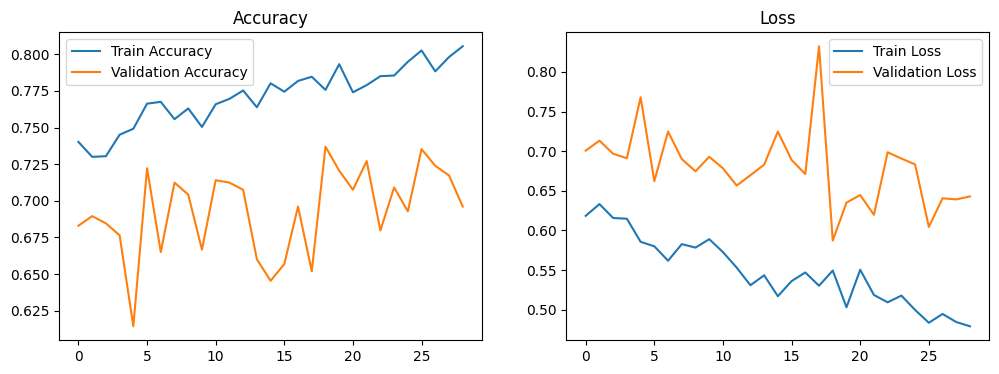

In [16]:
# Cell 7: Plotting Accuracy and Loss
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [17]:
val_loss, val_accuracy = model.evaluate(val_gen, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generating classification report and confusion matrix
val_gen.reset()
predictions = model.predict(val_gen)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

print("\nConfusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))

Validation Loss: 0.5938
Validation Accuracy: 0.7141
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 389ms/step

Classification Report:
              precision    recall  f1-score   support

           1       0.22      0.14      0.17       141
           2       0.50      0.59      0.54       285
           3       0.28      0.27      0.27       186

    accuracy                           0.39       612
   macro avg       0.33      0.33      0.33       612
weighted avg       0.37      0.39      0.37       612


Confusion Matrix:
[[ 20  70  51]
 [ 36 169  80]
 [ 35 101  50]]


In [19]:
model.save('brain_tumor_model.h5')
print("Model saved as 'brain_tumor_model.h5'")

Model saved as 'brain_tumor_model.h5'


In [20]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('brain_tumor_model.h5')
print("Model loaded successfully.")


Model loaded successfully.


In [36]:
# Path to the test image
test_image_path = 'D:\\brain\\1\\2338.png'

# Preprocess the image
img = image.load_img(test_image_path, target_size=(128, 128))  # Resize to match model input
img_array = image.img_to_array(img)  # Convert to array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize pixel values


In [37]:
# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  # Get the class index
confidence = np.max(predictions)  # Get the confidence of the prediction

# Define class labels (based on your dataset folder structure)
class_labels = ['Meningioma', 'Glioma', 'Pituitary Tumor']

# Output the result
print(f"Predicted Class: {class_labels[predicted_class[0]]}")
print(f"Confidence: {confidence:.2f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Class: Meningioma
Confidence: 0.59
